In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

## 1. Pie Charts

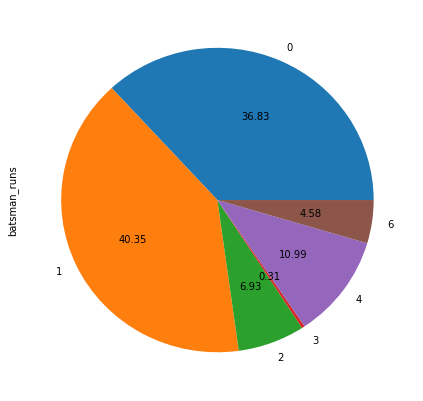

In [13]:

def batsman_statistics(batsman):
    delivery[delivery['batsman']==batsman]['batsman_runs'].value_counts().sort_index().plot(kind='pie',autopct='%.2f',figsize=(7,7))
batsman_statistics('V Kohli')

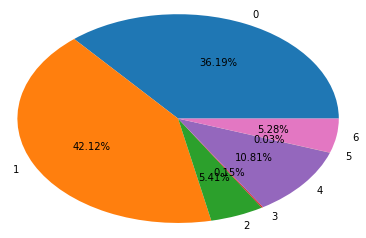

In [32]:
y=delivery[delivery['batsman']=='RG Sharma']['batsman_runs'].value_counts().sort_index()
plt.pie(y,labels=y.index,autopct='%.2f%%',radius=1.2)
plt.show()

## 2. Line Charts

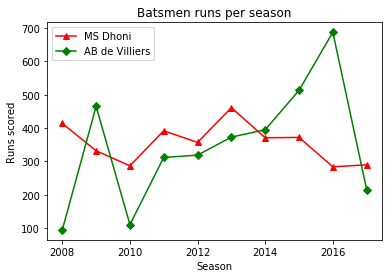

In [58]:
# Comparison between batsmen

def compare_batsmen_by_season(batsman1,batsman2):
    big=match.merge(delivery,left_on='id',right_on='match_id')
    perfVk=big[big['batsman']==batsman1].groupby('season').sum()['batsman_runs']
    perfRs=big[big['batsman']==batsman2].groupby('season').sum()['batsman_runs']
    plt.plot(perfVk.index,perfVk,color='red',marker='^',label=batsman1)
    plt.plot(perfRs.index,perfRs,color='green',marker='D',label=batsman2)
    plt.xlabel('Season')
    plt.ylabel('Runs scored')
    plt.title('Batsmen runs per season')
    plt.legend()
    plt.show()
    
compare_batsmen_by_season('MS Dhoni','AB de Villiers')

## 3. Scatter plot

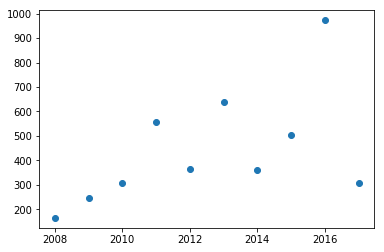

In [60]:
plt.scatter(perfVk.index,perfVk)

## 4. Bar Chart

In [61]:
y

0    1185
1    1379
2     177
3       5
4     354
5       1
6     173
Name: batsman_runs, dtype: int64

<BarContainer object of 7 artists>

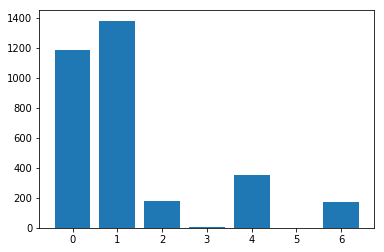

In [62]:
plt.bar(y.index,y)

## 5. Histogram

In [66]:
balls_played=delivery['batsman'].value_counts()
batsman_list=balls_played.index.tolist()
final=delivery[delivery['batsman'].isin(batsman_list)]
sr=(final.groupby('batsman').sum()['batsman_runs']/balls_played*100.0)
sr

A Ashish Reddy          142.857143
A Chandila               57.142857
A Chopra                 70.666667
A Choudhary             125.000000
A Flintoff              108.771930
A Kumble                 71.428571
A Mishra                 89.005236
A Mithun                130.769231
A Mukund                 82.608696
A Nehra                  65.079365
A Singh                  20.000000
A Symonds               124.711908
A Uniyal                 57.142857
A Zampa                  62.500000
AA Bilakhia              78.409091
AA Chavan               109.090909
AA Jhunjhunwala          99.541284
AA Noffke                75.000000
AB Agarkar              111.875000
AB Barath                97.674419
AB Dinda                 52.000000
AB McDonald             119.417476
AB de Villiers          145.129059
AC Blizzard             131.868132
AC Gilchrist            133.054662
AC Thomas               105.263158
AC Voges                126.573427
AD Mascarenhas          100.000000
AD Mathews          

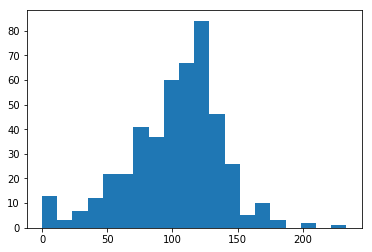

In [69]:
plt.hist(sr.values,bins=20)
plt.show()